In [268]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

cancer = datasets.load_breast_cancer(as_frame=True)
df = cancer.frame
X = df[['mean radius','mean texture']].values
y = df['target'].values
y = np.where(y == 0, 1, -1)

In [262]:

class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.errors = None
        self.bias = None

    def train(self, X, y):
        self.weights = np.random.randn(X.shape[1])
        self.errors = []
        self.bias = 0

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0)
            if errors == 0:
                break
            self.errors.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

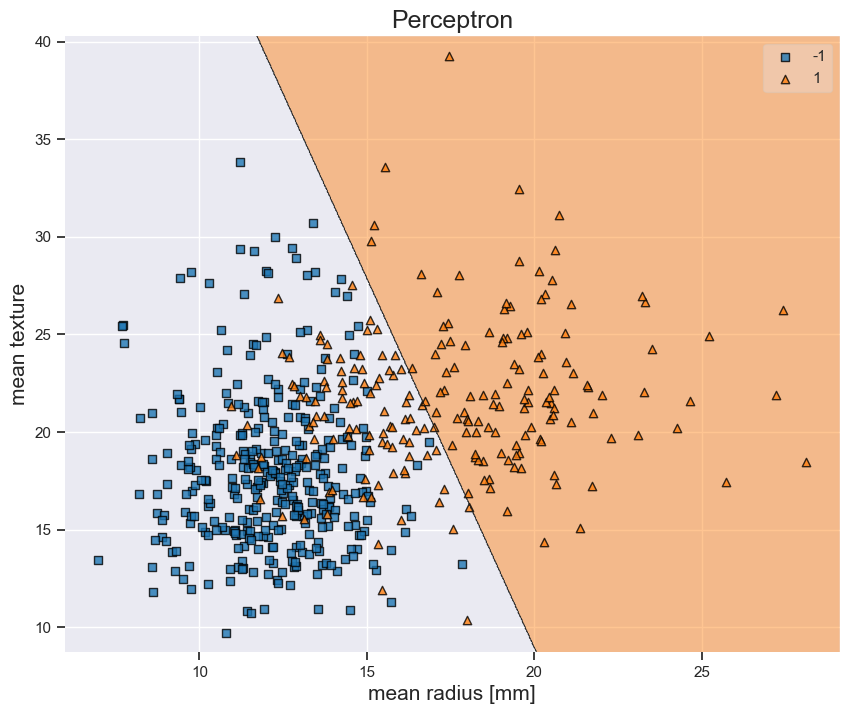

In [270]:
perceptron = Perceptron(learning_rate=0.5,epochs=10000).train(X,y)
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = perceptron)
plt.title("Perceptron", fontsize = 18)
plt.xlabel("mean radius [mm]", fontsize = 15)
plt.ylabel("mean texture", fontsize = 15)
plt.show()

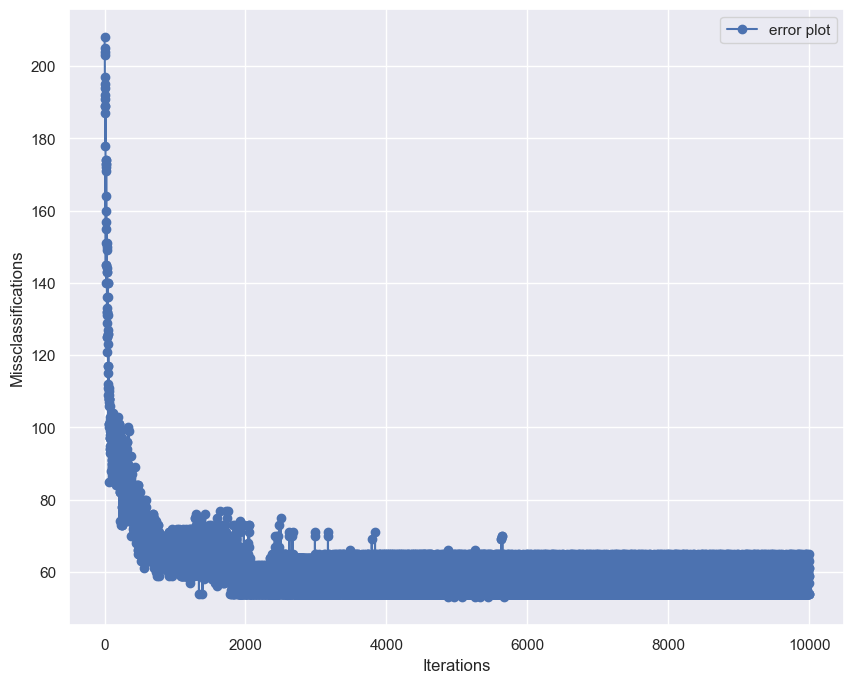

In [271]:


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(perceptron.errors)+1), perceptron.errors,
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()